In [1]:
import pandas as pd

In [2]:
from poloniex import Poloniex
from time import time
polo = Poloniex()



In [3]:
api = Poloniex(jsonNums=float)

In [22]:
%matplotlib inline

In [4]:
a = api.return24hVolume()
a = pd.DataFrame(a)

In [5]:
pairs = [pair for pair in a.columns if pair.startswith('USDT')]
print(pairs)

[u'USDT_BTC', u'USDT_DASH', u'USDT_ETC', u'USDT_ETH', u'USDT_LTC', u'USDT_NXT', u'USDT_REP', u'USDT_STR', u'USDT_XMR', u'USDT_XRP', u'USDT_ZEC']


In [6]:
a = pd.DataFrame()

for pair in pairs:
    raw = api.returnChartData(pair, period = api.HOUR * 2, start = time() - api.MONTH * 3)
    df = pd.DataFrame(raw)
    df['date'] = pd.to_datetime(df["date"], unit = 's')
    df.set_index('date', inplace = True)
    b = df['open']
    a[pair] = b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0f6050>]], dtype=object)

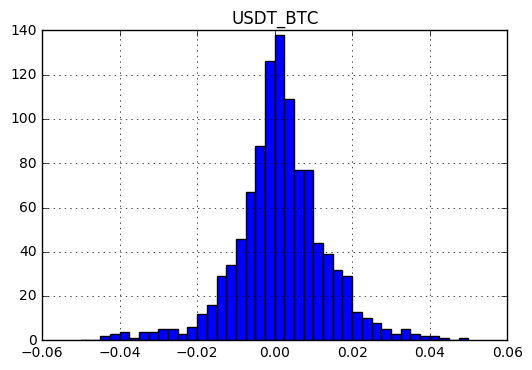

In [38]:
rendement = ( a.diff() / a)

rendement.hist(bins = 40, range = [-0.05, 0.05], column = 'USDT_BTC')

In [36]:
#Calcul de la moyenne des rendements de chaque 
rendement.mean(0)

USDT_BTC     0.000637
USDT_DASH    0.000460
USDT_ETC     0.001228
USDT_ETH     0.001335
USDT_LTC     0.001160
USDT_NXT     0.001308
USDT_REP     0.000174
USDT_STR     0.000953
USDT_XMR     0.000405
USDT_XRP     0.001352
USDT_ZEC     0.000905
dtype: float64

In [68]:
rendement_lag = rendement[1:]

#rendement_positif = rendement_lag[rendement[:-1]['USDT_BTC'] > 0.01]

tmp = rendement[:-1]
tmp.index = rendement_lag.index



rendement_positif = rendement_lag[tmp[:] > 0.01]

print(rendement_positif)

                     USDT_BTC  USDT_DASH      USDT_ETC  USDT_ETH  USDT_LTC  \
date                                                                         
2017-04-01 10:00:00 -0.000639   0.003441 -2.675386e-02  0.008994  0.014416   
2017-04-02 02:00:00 -0.004587  -0.017910  8.302344e-03  0.001385 -0.017570   
2017-04-02 10:00:00 -0.014263   0.028226 -1.213761e-02  0.011858 -0.031637   
2017-04-02 18:00:00 -0.014693  -0.159161 -8.982121e-02 -0.016716 -0.002395   
2017-04-02 22:00:00 -0.008070  -0.000568  1.506338e-02 -0.010697 -0.018182   
2017-04-03 04:00:00  0.019111  -0.019023  4.780876e-08 -0.048943 -0.035141   
2017-04-03 06:00:00 -0.001750   0.068020  1.869940e-02  0.016654  0.038231   
2017-04-03 22:00:00  0.007858  -0.016646 -2.130711e-02 -0.022475  0.019280   
2017-04-06 14:00:00 -0.011644   0.018873  6.794234e-03  0.013091  0.042614   
2017-04-06 22:00:00  0.008718  -0.033385 -1.398153e-02  0.001024 -0.026316   
2017-04-07 10:00:00  0.003743  -0.004215 -3.276887e-02 -0.004960

In [69]:
rendement_positif.mean(0)

USDT_BTC    -0.000605
USDT_DASH    0.000402
USDT_ETC     0.000773
USDT_ETH     0.001395
USDT_LTC     0.001116
USDT_NXT     0.000562
USDT_REP    -0.000366
USDT_STR     0.004399
USDT_XMR    -0.000433
USDT_XRP     0.005088
USDT_ZEC     0.002064
dtype: float64

In [70]:
print(rendement.corr())

           USDT_BTC  USDT_DASH  USDT_ETC  USDT_ETH  USDT_LTC  USDT_NXT  \
USDT_BTC   1.000000   0.585422  0.620630  0.667955  0.573118  0.469896   
USDT_DASH  0.585422   1.000000  0.524289  0.553522  0.467479  0.374866   
USDT_ETC   0.620630   0.524289  1.000000  0.705180  0.498341  0.450866   
USDT_ETH   0.667955   0.553522  0.705180  1.000000  0.516914  0.426727   
USDT_LTC   0.573118   0.467479  0.498341  0.516914  1.000000  0.393289   
USDT_NXT   0.469896   0.374866  0.450866  0.426727  0.393289  1.000000   
USDT_REP   0.528599   0.426007  0.471645  0.472759  0.435113  0.382071   
USDT_STR   0.359940   0.378128  0.376336  0.390215  0.384091  0.369015   
USDT_XMR   0.653632   0.571502  0.535768  0.597346  0.538226  0.460886   
USDT_XRP   0.395277   0.332154  0.319929  0.369099  0.334485  0.356134   
USDT_ZEC   0.507199   0.482918  0.499834  0.549511  0.400468  0.394764   

           USDT_REP  USDT_STR  USDT_XMR  USDT_XRP  USDT_ZEC  
USDT_BTC   0.528599  0.359940  0.653632  0.395277